In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Dogecoin Dataset

In [44]:
file_path = "C:\\Users\\asus\\Downloads\\PTDLKD_GIT\\IS403_O22_HTCL_12\\Dataset\\Dogecoin Historical Data.csv"

df = pd.read_csv(file_path)

# Chuyển đổi cột 'Date' sang định dạng ngày tháng
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Sắp xếp dữ liệu theo ngày tháng
df.sort_values('Date', inplace=True)

price = df['Price']

### Chia 7:3

In [45]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

### Chia 8:2

In [49]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

### Chia 9:1

In [53]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [54]:
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Trích xuất giá trị dự đoán
predictions = np.sqrt(forecast.variance.values[-1, :])

# Dự báo cho 90 ngày tiếp theo
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Tạo các ngày tương lai cho 30, 60, và 90 ngày
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')


Iteration:      1,   Func. Count:      4,   Neg. LLF: -2464.367136041088
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2464.3671619451466
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


C:\Users\asus\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.009265. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


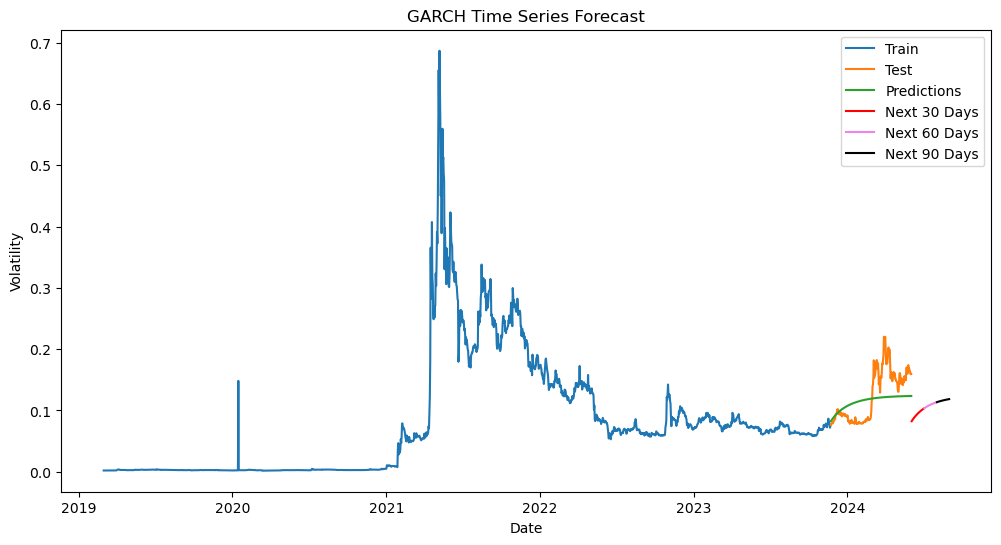

In [55]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')

plt.legend()
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 0.03663350255262534
MAPE: 25.245703697900517 %
MSE: 0.0013420135092732071


## BNB Dataset

In [64]:
file_path = "C:\\Users\\asus\\Downloads\\PTDLKD_GIT\\IS403_O22_HTCL_12\\Dataset\\BNB Historical Data.csv"

df = pd.read_csv(file_path)

# Chuyển đổi cột 'Date' sang định dạng ngày tháng
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Sắp xếp dữ liệu theo ngày tháng
df.sort_values('Date', inplace=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
price = df['Price']

### Chia 7:3

In [65]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

### Chia 8:2

In [69]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

### Chia 9:1

In [73]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [74]:
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Trích xuất giá trị dự đoán
predictions = np.sqrt(forecast.variance.values[-1, :])

# Dự báo cho 90 ngày tiếp theo
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Tạo các ngày tương lai cho 30, 60, và 90 ngày
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 51096.64577569268
Iteration:      2,   Func. Count:     10,   Neg. LLF: 10767.296762390693
Iteration:      3,   Func. Count:     14,   Neg. LLF: 10766.616162857359
Iteration:      4,   Func. Count:     18,   Neg. LLF: 10766.081106704612
Iteration:      5,   Func. Count:     22,   Neg. LLF: 10766.053048252685
Iteration:      6,   Func. Count:     26,   Neg. LLF: 10765.995350804837
Iteration:      7,   Func. Count:     30,   Neg. LLF: 10765.789231917981
Iteration:      8,   Func. Count:     34,   Neg. LLF: 10765.303587226996
Iteration:      9,   Func. Count:     38,   Neg. LLF: 10764.013342630817
Iteration:     10,   Func. Count:     42,   Neg. LLF: 10760.787593503646
Iteration:     11,   Func. Count:     46,   Neg. LLF: 10754.452645479189
Iteration:     12,   Func. Count:     50,   Neg. LLF: 10720.389354683
Iteration:     13,   Func. Count:     54,   Neg. LLF: 10516.818577531627
Iteration:     14,   Func. Count:     58,   Neg. LLF: 1

C:\Users\asus\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.061e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


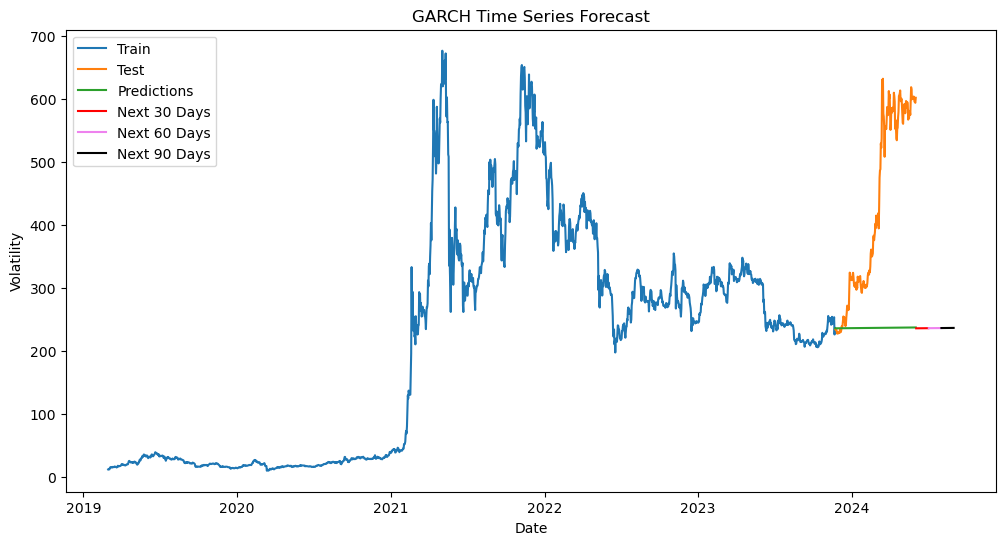

In [75]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSLE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 239.60715909059758
MAPE: 38.073595578671586 %
MSE: 57411.59068746694


## TRON Dataset

In [15]:
file_path = "C:\\Users\\asus\\Downloads\\PTDLKD_GIT\\IS403_O22_HTCL_12\\Dataset\\TRON Historical Data.csv"

df = pd.read_csv(file_path)

# Chuyển đổi cột 'Date' sang định dạng ngày tháng
df['Date'] = pd.to_datetime(df['Date'])

# Đặt cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

# Sắp xếp dữ liệu theo ngày tháng
df.sort_values('Date', inplace=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
price = df['Price']

### Chia 7:3

In [3]:
train_data = price[:int(0.7 * len(price))]
test_data = price[int(0.7 * len(price)):]

### Chia 8:2

In [7]:
train_data = price[:int(0.8 * len(price))]
test_data = price[int(0.8 * len(price)):]

### Chia 9:1

In [16]:
train_data = price[:int(0.9 * len(price))]
test_data = price[int(0.9 * len(price)):]

In [17]:
model = arch.arch_model(train_data, mean='Zero', vol='Garch', p=1, q=1)
model_fit = model.fit()

forecast = model_fit.forecast(horizon=len(test_data))

# Trích xuất giá trị dự đoán
predictions = np.sqrt(forecast.variance.values[-1, :])

# Dự báo cho 90 ngày tiếp theo
forecast_90 = model_fit.forecast(horizon=90)
predictions_90 = np.sqrt(forecast_90.variance.values[-1, :])

# Tạo các ngày tương lai cho 30, 60, và 90 ngày
future_dates_30 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_dates_60 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=31), periods=30, freq='D')
future_dates_90 = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=61), periods=30, freq='D')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 890050368.1534264
Iteration:      2,   Func. Count:     10,   Neg. LLF: -2915.3311274873204
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2915.3311273457894
            Iterations: 6
            Function evaluations: 10
            Gradient evaluations: 2


C:\Users\asus\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


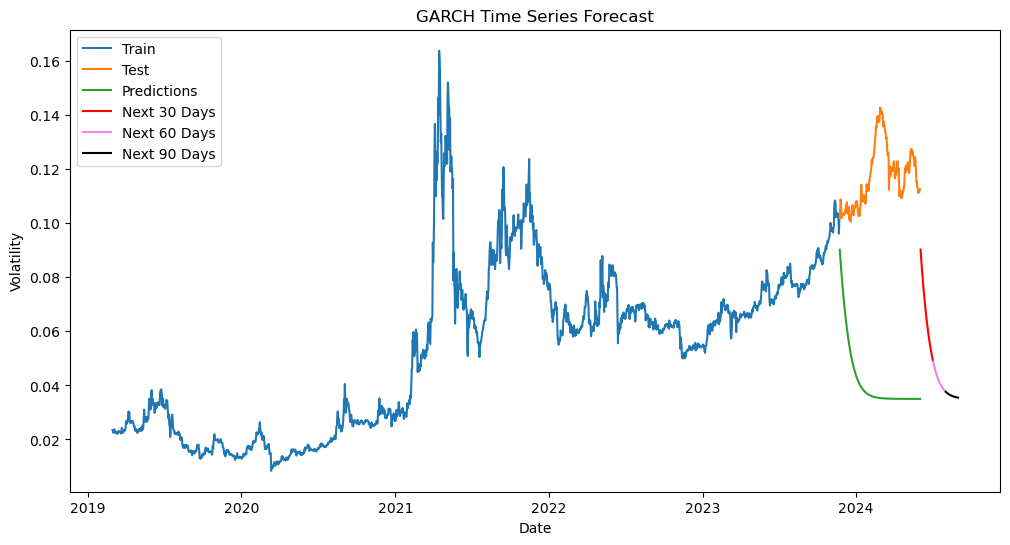

In [18]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions')

# Vẽ các dự báo 30, 60, và 90 ngày
plt.plot(future_dates_30, predictions_90[:30], label='Next 30 Days', color='red')
plt.plot(future_dates_60, predictions_90[30:60], label='Next 60 Days', color='violet')
plt.plot(future_dates_90, predictions_90[60:], label='Next 90 Days', color='black')

plt.title('GARCH Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Tính toán độ đo RMSE, MAPE và MSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mape = mean_absolute_percentage_error(test_data, predictions) * 100
mse = mean_squared_error(test_data, predictions)

# In kết quả
print("RMSE:", rmse)
print("MAPE:", mape, "%")
print("MSE:", mse)

RMSE: 0.07874126216433852
MAPE: 63.97130554946814 %
MSE: 0.0062001863672330884
